In [1]:
import pandas as pd

### 1. basic quality check

In [2]:
df = pd.read_csv('raw_data/Assignment_Data.csv')
df

,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...
...,...,...,...,...,...,...,...,...,...
195,196,50,Male,D001,6,Type A,8,0,Good recovery trajectory. Follow-up scan sched...
196,197,61,Female,D004,1,Type B,2,0,Patient discharged with minor discomfort. Advi...
197,198,26,Male,D002,0,Type C,8,0,Discharge after recovery from pneumonia. No co...
198,199,35,Female,D001,3,Type C,11,1,Blood pressure under control. Continue current...


In [3]:
df['readmitted_30_days'].mean()

0.325

In [4]:
df.describe()

,patient_id,age,num_previous_admissions,length_of_stay,readmitted_30_days
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,53.720000,1.600000,7.865000,0.32500
std,57.879185,21.294574,1.310951,4.134276,0.46955
min,1.000000,20.000000,0.000000,1.000000,0.00000
25%,50.750000,34.000000,1.000000,4.000000,0.00000
50%,100.500000,54.000000,1.000000,8.000000,0.00000
75%,150.250000,73.000000,2.000000,11.000000,1.00000
max,200.000000,89.000000,6.000000,14.000000,1.00000


In [5]:
df.isna().sum()

patient_id                 0
age                        0
gender                     0
diagnosis_code             0
num_previous_admissions    0
medication_type            0
length_of_stay             0
readmitted_30_days         0
discharge_note             0
dtype: int64

In [6]:
df.duplicated().sum()

0

### 2 make some plots

In [7]:
df.columns

Index(['patient_id', 'age', 'gender', 'diagnosis_code',
       'num_previous_admissions', 'medication_type', 'length_of_stay',
       'readmitted_30_days', 'discharge_note'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 2.1 categorical variables

In [9]:
cat_cols = ['gender', 'diagnosis_code', 'medication_type']

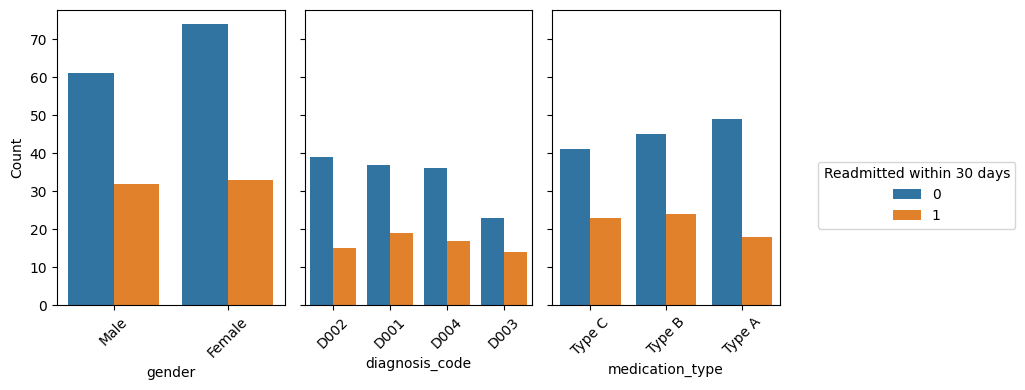

In [10]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(8, 4), sharey=True)

for i, (ax, col) in enumerate(zip(axes, cat_cols)):
    sns.countplot(data=df, x=col, hue='readmitted_30_days', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove()

# Move the legend outside
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Readmitted within 30 days',
           loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()

<Axes: xlabel='ratio', ylabel='category'>

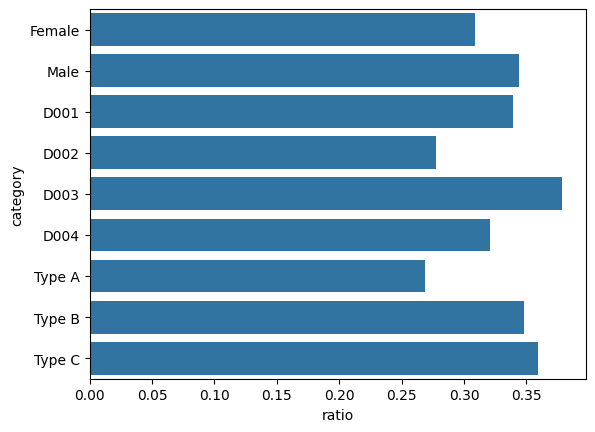

In [11]:
all_ratios = []
for col in cat_cols:
    tmp = df.groupby(col)['readmitted_30_days'].mean().reset_index()
    tmp.columns = ['category', 'ratio']
    all_ratios.append(tmp)
all_ratios = pd.concat(all_ratios, axis=0)
sns.barplot(all_ratios, y='category', x='ratio')

<Axes: xlabel='ratio', ylabel='category'>

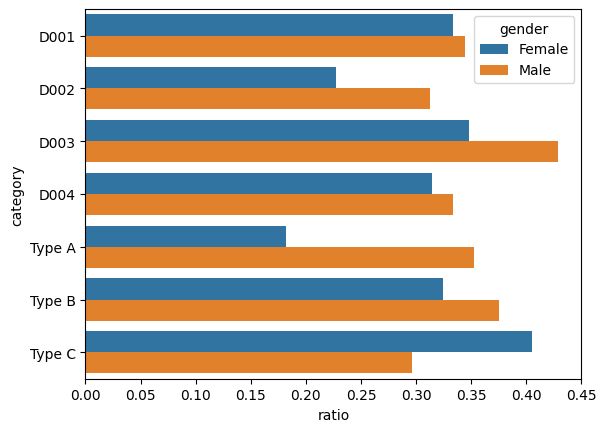

In [12]:
all_ratios = []
for col in ['diagnosis_code', 'medication_type']:
    tmp = df.groupby(['gender', col])['readmitted_30_days'].mean().reset_index()
    tmp.columns = ['gender', 'category', 'ratio']
    all_ratios.append(tmp)
all_ratios = pd.concat(all_ratios, axis=0)
sns.barplot(all_ratios, y='category', x='ratio', hue='gender')

#### the effects of gender on patients with D003 and Type C are opposite; logistic regression is likely not enough

#### 2.2 numerical variables

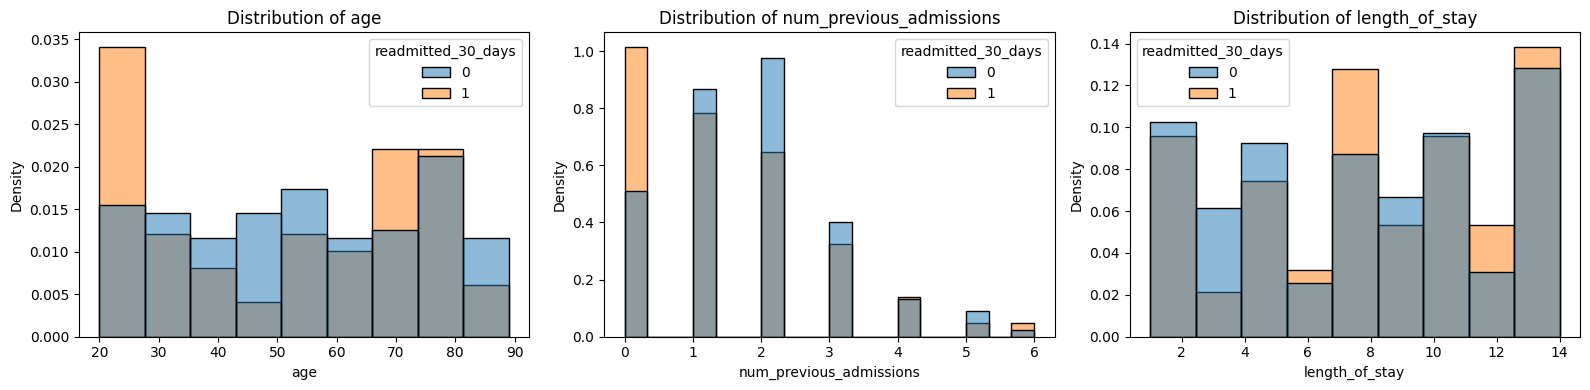

In [13]:
num_cols = ['age', 'num_previous_admissions', 'length_of_stay']
fig, axes = plt.subplots(1, len(num_cols), figsize=(16, 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, hue='readmitted_30_days', ax=ax, stat='density', common_norm=False)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

#### the readmitted patients are more likely to be <30, >70; 0 previous admission; longer stay

In [14]:
df.groupby('num_previous_admissions')['readmitted_30_days'].describe()

,count,mean,std,min,25%,50%,75%,max
num_previous_admissions,,,,,,,,
0,45.0,0.488889,0.505525,0.0,0.00,0.0,1.00,1.0
1,56.0,0.303571,0.463961,0.0,0.00,0.0,1.00,1.0
2,58.0,0.241379,0.431657,0.0,0.00,0.0,0.00,1.0
3,25.0,0.280000,0.458258,0.0,0.00,0.0,1.00,1.0
4,9.0,0.333333,0.500000,0.0,0.00,0.0,1.00,1.0
5,5.0,0.200000,0.447214,0.0,0.00,0.0,0.00,1.0
6,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0


In [15]:
df[num_cols].corrwith(df['readmitted_30_days'], method='spearman')

age                       -0.065659
num_previous_admissions   -0.149405
length_of_stay             0.055826
dtype: float64

#### 2.3 text features

In [16]:
df['discharge_note'].head(10)

0    Good recovery trajectory. Follow-up scan sched...
1    Stable post-surgery. Advised to avoid physical...
2    Symptoms controlled. Monitoring for relapse ad...
3    Stable post-surgery. Advised to avoid physical...
4    Stable post-surgery. Advised to avoid physical...
5    Good recovery trajectory. Follow-up scan sched...
6    Discharge after recovery from pneumonia. No co...
7    Patient discharged in stable condition. Recomm...
8    Patient showed improvement. Prescribed antibio...
9    Blood pressure under control. Continue current...
Name: discharge_note, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, stop_words='english')
X_binary = vectorizer.fit_transform(df['discharge_note'])
df_note_binary = pd.DataFrame(X_binary.toarray(), columns=vectorizer.get_feature_names_out())
df_note_binary['readmitted_30_days'] = df['readmitted_30_days']
df_note_binary

,activity,advised,alternative,antibiotics,avoid,blood,complications,condition,continue,control,...,showed,signs,stable,surgery,switched,symptoms,trajectory,treatment,weeks,readmitted_30_days
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
196,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df_note_feature_check = df_note_binary.groupby('readmitted_30_days').mean().T
df_note_feature_check['diff'] = df_note_feature_check.iloc[:, 0] - df_note_feature_check.iloc[:,1]
df_note_feature_check.sort_values(by='diff')

readmitted_30_days,0,1,diff
pressure,0.066667,0.200000,-0.133333
blood,0.066667,0.200000,-0.133333
continue,0.066667,0.200000,-0.133333
control,0.066667,0.200000,-0.133333
current,0.066667,0.200000,-0.133333
medication,0.155556,0.276923,-0.121368
monitoring,0.088889,0.169231,-0.080342
relapse,0.088889,0.169231,-0.080342
symptoms,0.088889,0.169231,-0.080342
controlled,0.088889,0.169231,-0.080342


In [19]:
# do a more formal t-test
from scipy.stats import ttest_ind

t_results = []
label_col = 'readmitted_30_days'
for col in df_note_binary.columns:
    if col == label_col:  continue
    group1 = df_note_binary.loc[df_note_binary[label_col] == 1, col]
    group0 = df_note_binary.loc[df_note_binary[label_col] == 0, col]
    stat, p = ttest_ind(group1, group0, equal_var=False)
    t_results.append({"word": col, "t_stat": stat, "p_value": p})
    
df_ttest = pd.DataFrame(t_results).sort_values("p_value")
df_ttest.sort_values(by='p_value')

,word,t_stat,p_value
9,control,2.448919,0.016299
5,blood,2.448919,0.016299
35,pressure,2.448919,0.016299
8,continue,2.448919,0.016299
11,current,2.448919,0.016299
23,medication,1.893369,0.061050
15,discharged,-1.738911,0.084073
20,hydration,-1.720805,0.087030
28,normal,-1.720805,0.087030
45,signs,-1.720805,0.087030


In [20]:
df.loc[df['discharge_note'].str.contains('control', case=False, na=False), 'discharge_note'].tolist()

['Symptoms controlled. Monitoring for relapse advised.',
 'Blood pressure under control. Continue current medication.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Blood pressure under control. Continue current medication.',
 'Symptoms controlled. Monitoring for relapse advised.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Symptoms controlled. Monitoring for re

In [21]:
df.loc[df['discharge_note'].str.contains('current medication', case=False, na=False), 'discharge_note'].tolist()

['Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medication.',
 'Blood pressure under control. Continue current medica

In [22]:
df.loc[df['discharge_note'].str.contains('discharged', case=False, na=False), 'discharge_note'].tolist()

['Patient discharged in stable condition. Recommend follow-up in 2 weeks.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged in stable condition. Recommend follow-up in 2 weeks.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged in stable condition. Recommend follow-up in 2 weeks.',
 'Patient discharged in stable condition. Recommend follow-up in 2 weeks.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged in stable condition. Recommend follow-up in 2 weeks.',
 'Patient discharged in stab

In [23]:
df.loc[df['discharge_note'].str.contains('infection', case=False, na=False), 'discharge_note'].tolist()

['No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal diet and activity.',
 'No further signs of infection. Resume normal d

In [24]:
df.loc[df['discharge_note'].str.contains('discomfort', case=False, na=False), 'discharge_note'].tolist()

['Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discomfort. Advised rest and hydration.',
 'Patient discharged with minor discom

So these words seem important (p<0.1, ideally we will run through stemming etc)

1. blood pressure
2. minor discomfort
3. rest and hydration
4. current medication
5. Monitoring for relapse
6. No further signs of infection (maybe?)

In [25]:
key_phrases = [
    'blood pressure',
    'minor discomfort',
    'rest and hydration',
    'current medication',
    'monitoring for relapse',
    'no further signs of infection'
]

for phrase in key_phrases:
    df[f"{phrase}_mentioned"] = df['discharge_note'].str.lower().str.contains(phrase).astype(float)

In [26]:
df

,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note,blood pressure_mentioned,minor discomfort_mentioned,rest and hydration_mentioned,current medication_mentioned,monitoring for relapse_mentioned,no further signs of infection_mentioned
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...,0.0,0.0,0.0,0.0,0.0,0.0
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...,0.0,0.0,0.0,0.0,0.0,0.0
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...,0.0,0.0,0.0,0.0,1.0,0.0
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...,0.0,0.0,0.0,0.0,0.0,0.0
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,50,Male,D001,6,Type A,8,0,Good recovery trajectory. Follow-up scan sched...,0.0,0.0,0.0,0.0,0.0,0.0
196,197,61,Female,D004,1,Type B,2,0,Patient discharged with minor discomfort. Advi...,0.0,1.0,1.0,0.0,0.0,0.0
197,198,26,Male,D002,0,Type C,8,0,Discharge after recovery from pneumonia. No co...,0.0,0.0,0.0,0.0,0.0,0.0
198,199,35,Female,D001,3,Type C,11,1,Blood pressure under control. Continue current...,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
cols_phrase = [f"{x}_mentioned" for x in key_phrases]
cols_phrase


['blood pressure_mentioned',
 'minor discomfort_mentioned',
 'rest and hydration_mentioned',
 'current medication_mentioned',
 'monitoring for relapse_mentioned',
 'no further signs of infection_mentioned']

<Axes: xlabel='readmitted_30_days', ylabel='phrase'>

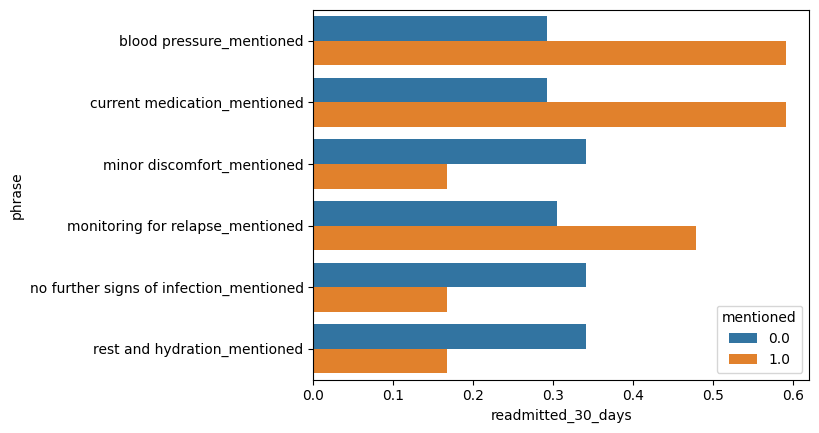

In [28]:
tmp = df.melt(id_vars="readmitted_30_days", value_vars=cols_phrase, 
              var_name="phrase", value_name="mentioned") \
        .groupby(['phrase', 'mentioned']).mean() \
        .reset_index()

sns.barplot(data=tmp, y="phrase", x="readmitted_30_days", hue="mentioned")